# Guide 1. Loading raw and quality controlled ADCP data

This notebook is prepared for Moffat and Nichol by the NCSU Coastal Hazards Lab (Dr. Katherine Anarde, Levi Lavengood, Brooke Gaenzle, Elizabeth Farquhar) for the analysis, visualization, and interpretation of data collected as part of the Frying Pan Shoals Hydrodynamic Characterization project (2024-2025). Subsequent notebooks (Guides 2 - XXX) will detail individual deployments and summarize bulk statistics. All scripts used for post-processing (quality control and bulk statistics) are included in the parent directory and referenced herein by name where appropriate.

**Data Collection**


Data collection for all deployments utilized two Nortek Signature 1000 High Resolution acoustic doppler current profilers (ADCPs), herein referenced as S0_103080 and S1_101481. The ADCPs collected data at 4 Hz, including binned water velocities throughout the water column, pressure, and instrument orientation (pitch, heading, roll) over the course of each deployment, which spanned a minimum of 20 days. Herein, we utilize data from Deployment 1 (spanning August 20th to September 19th) to illustrate the outputs of data quality control. For a complete description of quality control procedures, the reader is directed to the Sig1k_Writeup.pdf in the same folder as this document.

**1. Summary of post-processing workflow**

The ADCP onboard processor breaks data streams into multiple files for storage, with each file being 1 gigabyte in size. For Deployment 1, this resulted in ~30 1GB files of raw data for each ADCP. The files types for the raw data files are .mat. The first step in our post-processing workflow is to convert this file type to a format more manageable for data manipulation in python. Here we use the HDF5 format. 

In this file you will see the data identified in groups. Due to the size of the data we have opted to to analyze the data in these raw 1GB files at a time. This means we are analyzing data in approximately 24 hour chunks. So Group1 of ADCP S0-103080 would refer to the group of variables stored individually as hdf files(Time.h5,Pressure.h5,NorthVel.h5, etc.) from the first 24 hour period of data collection, although it will not appear this way in the file since the first few hours of a deployment the ADCP is out of water. 

Within each group, there are HDF5 files for each variable of interest. The data can be read by using Pandas to convert from a HDF5 file to a Pandas Dataframe.

**2. Loading HDF5 files**

Here is an example on how to read in and interpret data from a single HDF5 file in Group1:

In [1]:
# Import necessary packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as dt
import matplotlib.axes as axs

In [2]:
# Establish directory and filenames
directory_path=r"/Volumes/kanarde/BOEM/BHBoemData/Processed/S0_103080/Group1" # this will need to be changed per computer/user and per group
files=os.listdir(directory_path) # list of files in Group1
print(files) # prints out a list of all of the data files within Group 1


['AbsVel.h5', 'CellDepth.h5', 'EastVel.h5', 'ErrVel.h5', 'NorthVel.h5', 'Time.h5', 'VertVel.h5', 'Heading.h5', 'Pitch.h5', 'Pressure.h5', 'Roll.h5']


In [3]:
# Here we are going to read in the HDF5 files containing data
# create a dictionary to store files
data={}
for file in files:
    # file path
    file_path = os.path.join(directory_path, file)
    # read the file into a Pandas dataframe
    df=pd.read_hdf(file_path)
    # file name 
    file_name=file_path.split('/')[-1].split('.')[0]
    print(file_name)
    # store dataframe
    data[file_name]=df



AbsVel
CellDepth


HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 620, in H5Fopen
    unable to open file
  File "H5VLcallback.c", line 3502, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "H5PLpath.c", line 579, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "H5PLpath.c", line 620, in H5PL__path_table_iterate_process_path
    can't open directory: /opt/anaconda3/lib/hdf5/plugin
  File "H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 1898, in H5F_open
    unable to lock the file
  File "H5FD.c", line 1625, in H5FD_lock
    driver lock request failed
  File "H5FDsec2.c", line 1002, in H5FD__sec2_lock
    unable to lock file, errno = 13, error message = 'Permission denied'

End of HDF5 error back trace

Unable to open/create file '/Volumes/kanarde/BOEM/BHBoemData/Processed/S0_103080/Group1/EastVel.h5'

In [4]:
# Now we can look at each parameter in our data dictionary
print(data['AbsVel']) # example shown with Absolute Velocity
# We will use this more later


              0         1         2         3         4         5         6   \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
345595  0.174225  0.229429  0.171379  0.186742  0.526882  0.202831  0.245317   
345596  0.094579  0.179882  0.145588  0.286287  0.756010  0.943179  0.954356   
345597  0.207274  0.343940  0.146397  0.586909  1.134467  0.964396  0.900018   
345598  0.178417  0.135677  0.084975  0.225680  0.348949  0.240426  0.070925   
345599  0.093963  0.275459  0.159054  0.194653  0.747966  0.655495  0.479443   

              7         8         9   .

We have now put all of the files from Group1 into a Python Dictionary and can call them as individual dataframes. Each variable is described below.

**CellDepth**: This represents the nominal depth of each cell. Within each cell, the ADCP collects an average value of velocity and pressure, which we can see in later plots. The CellDepth data frame is 1 column and has rows equal to the number of cells until the water surface. This is possible because the number of cells does not change over time. 



The dataset will need to be expanded to have as many columns as the rest of the collected variables to be used in plotting. 



In [5]:
# Lets look at celldepth
print(data['CellDepth'])

       0
0    0.6
1    1.1
2    1.6
3    2.1
4    2.6
5    3.1
6    3.6
7    4.1
8    4.6
9    5.1
10   5.6
11   6.1
12   6.6
13   7.1
14   7.6
15   8.1
16   8.6
17   9.1
18   9.6
19  10.1
20  10.6
21  11.1
22  11.6
23  12.1
24  12.6
25  13.1
26  13.6
27  14.1
28  14.6
29  15.1


In [6]:
# Now we can expand to have as many columns as the rest of the data (over time)
n=len(data['AbsVel'])
print(n)
df=data['CellDepth']
CellDepth = pd.DataFrame(np.repeat(df.values, n, axis=1), columns=np.tile(df.columns, n))
print(CellDepth)

345600
       0     0     0     0     0     0     0     0     0     0  ...     0  \
0    0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6   0.6  ...   0.6   
1    1.1   1.1   1.1   1.1   1.1   1.1   1.1   1.1   1.1   1.1  ...   1.1   
2    1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6   1.6  ...   1.6   
3    2.1   2.1   2.1   2.1   2.1   2.1   2.1   2.1   2.1   2.1  ...   2.1   
4    2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6   2.6  ...   2.6   
5    3.1   3.1   3.1   3.1   3.1   3.1   3.1   3.1   3.1   3.1  ...   3.1   
6    3.6   3.6   3.6   3.6   3.6   3.6   3.6   3.6   3.6   3.6  ...   3.6   
7    4.1   4.1   4.1   4.1   4.1   4.1   4.1   4.1   4.1   4.1  ...   4.1   
8    4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6   4.6  ...   4.6   
9    5.1   5.1   5.1   5.1   5.1   5.1   5.1   5.1   5.1   5.1  ...   5.1   
10   5.6   5.6   5.6   5.6   5.6   5.6   5.6   5.6   5.6   5.6  ...   5.6   
11   6.1   6.1   6.1   6.1   6.1   6.1   6.1   6.1   6.1   6.1  ...  

From the CellDepth dataframe, we can see that the cells are 0.5 m in length and span from 0 m (sensor) to 15.1 m. However, if the water surface elevation (depth) is smaller than the maximum CellDepth of 15.1 m, we will see empty cells (white cells). This can be seen in later plots.

**Time**: This variable has the date and times for every measurement made by the ADCP, and it is stored in python’s datetime structure.

**Heading, Pitch, and Roll (deg)**: These variables represent the orientation of the sensor. Since the sensor was bottom mounted, it should remain constant throughout the deployment. If they are not constant, then the sensor has moved and appropriate corrections will need to be made. 


In [27]:
# Since we are in group 1, the first 24 hrs of data collection, we need to identify a start time that represents when the ADCP is settled at the bottom of the ocean and no longer being moved. 
start_time=datetime.datetime(2024,8,20,18,30)

In [28]:
# Plot Heading, Pitch, and Roll over time
plt.figure(figsize=(10,6))
plt.plot(data['Time'],data['Heading'], label='Heading')
plt.plot(data['Time'],data['Pitch'], label='Pitch')
plt.plot(data['Time'],data['Roll'], label='Roll')
plt.xlabel('Date (DD HH:MM)')
plt.ylabel('Degrees')
plt.ylim(bottom= -10, top =105)
plt.xlim(left=start_time) # This is here for group 1 only to cut out transportation of sensor
plt.legend()
plt.show()

OverflowError: int too big to convert

<Figure size 1000x600 with 1 Axes>

In Group1, Heading and Pitch remain relatively constant, as expected. There are slight changes in Roll that can be identified from the graph.

**AbsVel(m/s)**: This is the absolute velocity. The absolute velocity is the magnitude of all the components measured. This field is useful for seeing broad trends in flow rates.  


In [29]:
# create a meshgrid of time and celldepth
x,y=np.meshgrid(data['Time'],data['CellDepth'])
z=data['AbsVel']

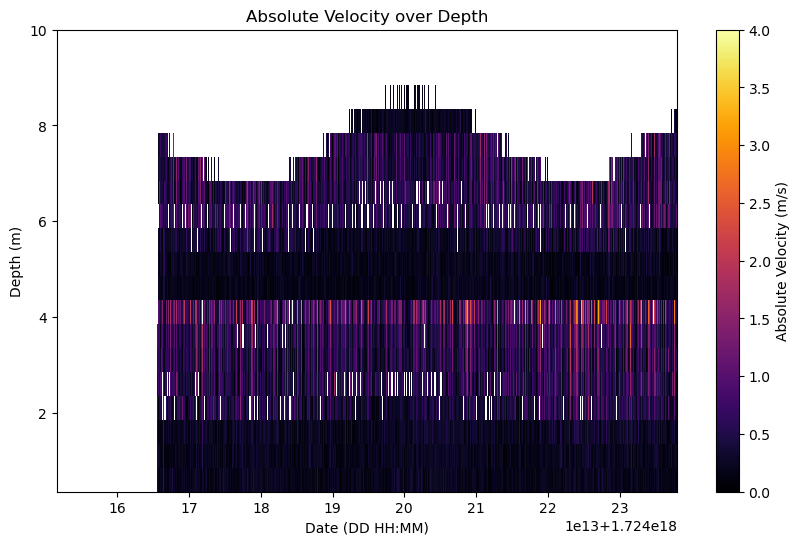

In [30]:
# Plot Velocity over time per cell
plt.figure(figsize=(10,6))
plt.pcolormesh(
    x,y,z.T, cmap='inferno', shading='nearest', vmin=0, vmax=4
)
plt.ylim(top=10)
plt.xlabel("Date (DD HH:MM)")
plt.ylabel("Depth (m)")
plt.title('Absolute Velocity over Depth')
im1=plt.colorbar()
im1.ax.set_ylabel("Absolute Velocity (m/s)")
plt.show()

We can see that depth is changing over this 24 hour period due to the tidal range. Each color strip you see on the plot represented an averaged absolute velocity per cell per each sample taken (every 0.25 seconds or 4 Hz). The white space represents empty cells where the water depth was smaller than the maximum CellDepth the ADCP can measure. It can be helpfule to think of the white cells as the air above the ocean, whereas the colored cells are data from the surface of the ocean to the top of the ADCP sensor.

**VertVel(m/s)**: This is the vertical component of the velocities measured using beam 3. Beam 3 is in the instruments "forward" direction, and is used to measure the vertical velocity. We can create a similar plot to the one above.


In [114]:
# create a meshgrid of time and celldepth
x,y=np.meshgrid(data['Time'],data['CellDepth'])
z=data['VertVel']

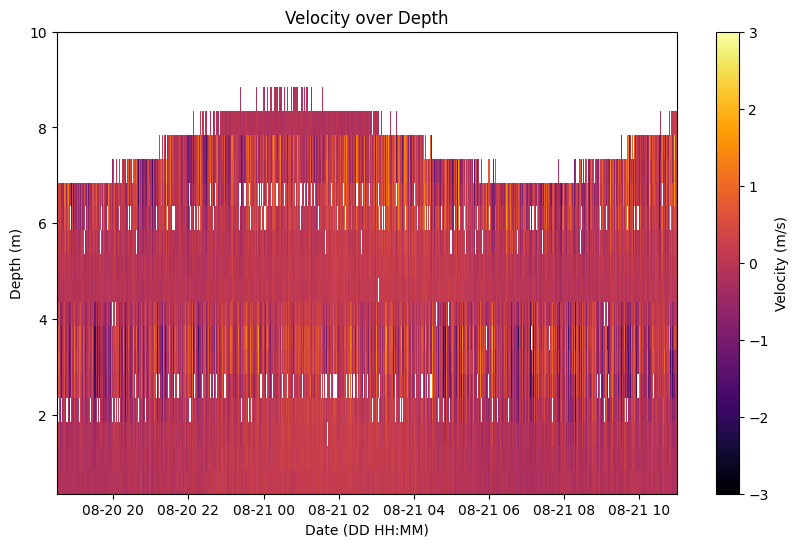

In [117]:
# Plot Velocity over time per cell
plt.figure(figsize=(10,6))
plt.pcolormesh(
    x,y,z.T, cmap='inferno', shading='nearest', vmin=-3, vmax=3 
) 
plt.ylim(top=10)
plt.xlabel("Date (DD HH:MM)")
plt.ylabel("Depth (m)")
plt.title('Velocity over Depth')
im1=plt.colorbar()
im1.ax.set_ylabel("Velocity (m/s)")
plt.show()

Again, we can see that depth is changing over this 24 hour period due to the tidal range. Each color strip you see on the plot represented an averaged vertical velocity component per cell per each sample taken (every 0.25 seconds or 4 Hz).

**EastVel and NorthVel**: These are the east and north velocity components and can be used to assess phase wrapping. Phase wrapping happens when the second signal sent out by the instrument is sent before the first signal has been received by the instrument. The instrument is then unabke to differentiate between the first and second signal, and therefore unable to record the velocity for that collection. This can be done by creating distribution plots of each component. 

These are each 345600 rows x 30 columns, where the rows represent collection time and the columns represent each cell (described in CellDepth). 


**ErrVel (m/s)**: The error velocity is made by using two different beams to measure the same velocity component, in our case the vertical velocity, and finding the difference between each. This means that if you are seeing large ErrVel values you likely have a beam failure or something interfering with the beam. Values of ~.1 are acceptable since the values are measured in slightly different locations due to the different angles of the beam. 
This dataframe is 345600 rows x 30 columns, where the rows represent collection time and the columns represent each cell. 

In [89]:
# create a meshgrid of time and celldepth
x,y=np.meshgrid(data['Time'],data['CellDepth'])
z=data['ErrVel']


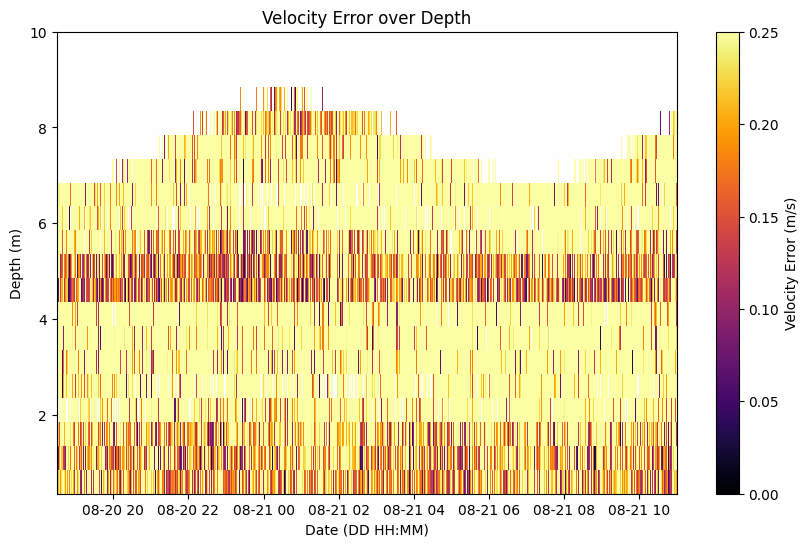

In [102]:
# Plot
plt.figure(figsize=(10,6))
plt.pcolormesh(
    x,y,z.T, cmap='inferno', shading='nearest', vmin=0, vmax=0.25
)
plt.xlim(left=datetime.datetime(2024,8,20,18,30))
plt.ylim(top=10)
plt.xlabel("Date (DD HH:MM)")
plt.ylabel("Depth (m)")
plt.title('Velocity Error over Depth')
im1=plt.colorbar()
im1.ax.set_ylabel("Velocity Error (m/s)")
plt.show()

**Pressure(db)**: The Pressure variable represents the pressure that the sensor “feels” above it. It can be plotted for a quick check.



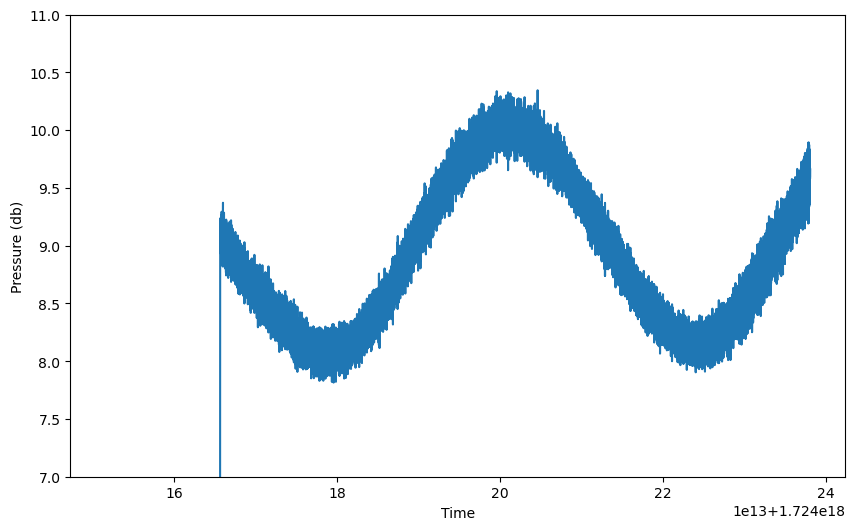

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data['Time'],data['Pressure'])
plt.xlabel('Time')
plt.xlim(left=start_time)
plt.ylabel('Pressure (db)')
plt.ylim(bottom=7, top=11)
plt.show()

Deriving the water depth from pressure is a 1:1 conversion using the hydrostatic pressure equation. 

In [53]:
# convert db to Pa
pressure_Pa=data['Pressure']*10000
# gravitational constant
g=9.81 # (m/s)
# density of sea water 
rho=1024 # (kg/m^3)
# use hydrostatic pressure equation to relate pressure to depth (P=rho*g*h)
depth=pressure_Pa/(g*rho)

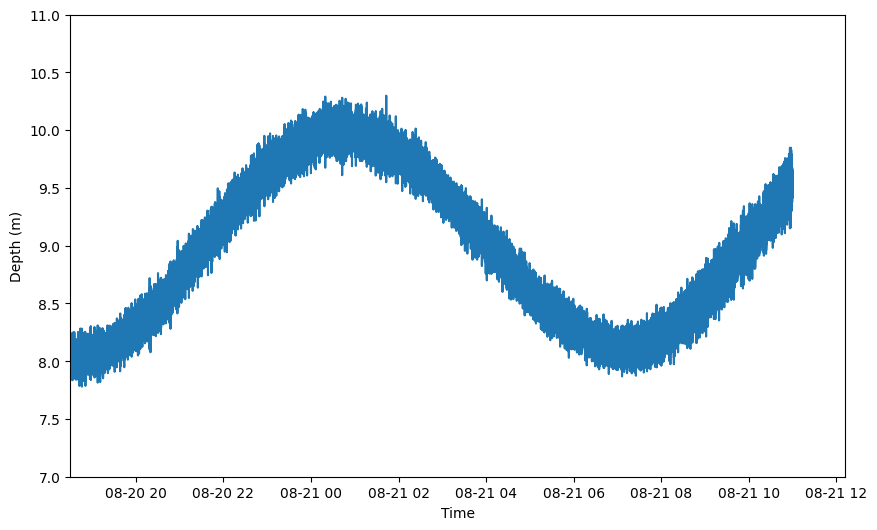

In [108]:
plt.figure(figsize=(10,6))
plt.plot(data['Time'],depth)
plt.xlabel('Time')
plt.xlim(left=start_time)
plt.ylabel('Depth (m)')
plt.ylim(bottom=7, top=11)
plt.show()